In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df_confirmed = pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv")
df_confirmed.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,...,6/27/21,6/28/21,6/29/21,6/30/21,7/1/21,7/2/21,7/3/21,7/4/21,7/5/21,7/6/21,7/7/21,7/8/21,7/9/21,7/10/21,7/11/21,7/12/21,7/13/21,7/14/21,7/15/21,7/16/21,7/17/21,7/18/21,7/19/21,7/20/21,7/21/21,7/22/21,7/23/21,7/24/21,7/25/21,7/26/21,7/27/21,7/28/21,7/29/21,7/30/21,7/31/21,8/1/21,8/2/21,8/3/21,8/4/21,8/5/21
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,4519,4730,4794,4871,4962,4962,4962,4962,5283,5360,5415,5477,5561,5561,5561,5791,5791,5923,5983,5983,5983,5983,6213,6266,6266,6325,6357,6357,6357,6477,6515,6577,6615,6677,6677,6677,6774,6804,6836,6864
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,2456,2456,2456,2456,2456,2456,2456,2456,2456,2456,2456,2456,2456,2456,2456,2456,2456,2456,2456,2456,2456,2456,2456,2456,2456,2456,2456,2456,2456,2456,2456,2457,2457,2457,2457,2457,2457,2457,2457,2457
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,3693,3699,3708,3716,3726,3735,3745,3755,3765,3775,3786,3798,3811,3824,3836,3851,3867,3882,3895,3910,3922,3938,3956,3979,3994,4008,4026,4042,4063,4087,4112,4161,4189,4219,4254,4291,4329,4370,4404,4441
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,127,127,127,127,127,127,127,127,127,127,127,127,127,127,127,127,127,127,127,127,127,127,127,127,127,127,127,127,127,127,127,127,127,128,128,128,128,128,128,128
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,889,891,894,900,903,906,910,913,915,920,925,925,928,929,935,939,941,946,951,952,954,957,969,970,973,977,981,982,984,991,994,1000,1003,1008,1011,1016,1018,1022,1026,1032


In [3]:
df_confirmed.shape

(279, 566)

In [4]:
country="Tunisia"
#country="US"

In [5]:
df_confirmed_country= df_confirmed[df_confirmed["Country/Region"]==country]
df_confirmed_country.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,...,6/27/21,6/28/21,6/29/21,6/30/21,7/1/21,7/2/21,7/3/21,7/4/21,7/5/21,7/6/21,7/7/21,7/8/21,7/9/21,7/10/21,7/11/21,7/12/21,7/13/21,7/14/21,7/15/21,7/16/21,7/17/21,7/18/21,7/19/21,7/20/21,7/21/21,7/22/21,7/23/21,7/24/21,7/25/21,7/26/21,7/27/21,7/28/21,7/29/21,7/30/21,7/31/21,8/1/21,8/2/21,8/3/21,8/4/21,8/5/21
252,NaN,Tunisia,33.886917,9.537499,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,14654,14737,14843,14959,15065,15179,15261,15377,15482,15601,15735,15861,16050,16244,16388,16494,16651,16845,17009,17214,17354,17527,17644,17821,17913,18052,18052,18369,18600,18804,18968,19027,19336,19503,19686,20067,20226,20226,20550,20550


In [6]:
df_confirmed_country.shape

(1, 566)

In [7]:
df_confirmed_country=pd.DataFrame(df_confirmed_country[df_confirmed_country.columns[4:]].sum(),columns=["confirmed"])

In [8]:
df_confirmed_country.shape

(562, 1)

In [9]:
df_confirmed_country.head()

,confirmed
1/22/20,0
1/23/20,0
1/24/20,0
1/25/20,0
1/26/20,0


In [10]:
df_confirmed_country.index = pd.to_datetime(df_confirmed_country.index,format='%m/%d/%y')

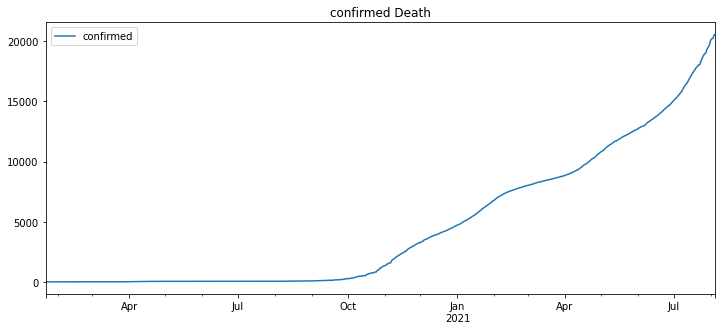

In [11]:
df_confirmed_country.plot(figsize=(12,5),title='confirmed Death')

In [12]:
df_confirmed_country.tail(10)

,confirmed
2021-07-27,18968
2021-07-28,19027
2021-07-29,19336
2021-07-30,19503
2021-07-31,19686
2021-08-01,20067
2021-08-02,20226
2021-08-03,20226
2021-08-04,20550
2021-08-05,20550


In [13]:
print('Total days in the dataSet',len(df_confirmed_country))

Total days in the dataSet 562


In [14]:
x = len(df_confirmed_country)-14

In [15]:
train = df_confirmed_country.iloc[:x]
test = df_confirmed_country.iloc[x:]

In [16]:
from sklearn.preprocessing import MinMaxScaler

In [17]:
scaler = MinMaxScaler()
scaler.fit(train)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [18]:
train_scaled = scaler.transform(train)
test_scaled = scaler.transform(test)

In [19]:
from keras.preprocessing.sequence import TimeseriesGenerator

In [20]:
seq_size = 7 # 7 days
n_features = 1
train_generator = TimeseriesGenerator(train_scaled,train_scaled,length=seq_size,batch_size=1)

In [22]:
print("Total number of samples in the original training data = ", len(train)) # 548
print("Total number of samples in the generated data = ", len(train_generator)) # 541 with seq_size=7

Total number of samples in the original training data =  548
Total number of samples in the generated data =  541


In [23]:
x,y = train_generator[10]

In [24]:
x.shape

(1, 7, 1)

In [25]:
y.shape

(1, 1)

In [26]:
test_generator = TimeseriesGenerator(test_scaled, test_scaled, length=seq_size, batch_size=1)
print("Total number of samples in the original training data = ", len(test)) # 14 as we're using last 14 days for test
print("Total number of samples in the generated data = ", len(test_generator)) # 7

Total number of samples in the original training data =  14
Total number of samples in the generated data =  7


In [27]:
x,y = test_generator[0]

#Model

In [28]:
from keras.models import Sequential
from keras.layers import Dense,LSTM,Dropout,Activation

In [29]:
model =Sequential()
model.add(LSTM(150,activation='relu',return_sequences=True,input_shape=(seq_size,n_features)))
model.add(LSTM(64,activation='relu'))
model.add(Dense(64))
model.add(Dense(1))

In [30]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 7, 150)            91200     
_________________________________________________________________
lstm_1 (LSTM)                (None, 64)                55040     
_________________________________________________________________
dense (Dense)                (None, 64)                4160      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 65        
Total params: 150,465
Trainable params: 150,465
Non-trainable params: 0
_________________________________________________________________


In [31]:
model.compile(optimizer='adam', loss='mean_squared_error',metrics=['accuracy'])

In [32]:
history = model.fit_generator(train_generator,validation_data=test_generator,epochs=50,steps_per_epoch=10)

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1915: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/50
10/10 [==============================] - 25s 138ms/step - loss: 0.1457 - accuracy: 0.0000e+00 - val_loss: 0.6286 - val_accuracy: 0.0000e+00
Epoch 2/50
10/10 [==============================] - 0s 30ms/step - loss: 0.1314 - accuracy: 0.0000e+00 - val_loss: 0.0384 - val_accuracy: 0.0000e+00
Epoch 3/50
10/10 [==============================] - 0s 31ms/step - loss: 0.0291 - accuracy: 0.1041 - val_loss: 0.0549 - val_accuracy: 0.0000e+00
Epoch 4/50
10/10 [==============================] - 0s 30ms/step - loss: 0.0194 - accuracy: 0.0000e+00 - val_loss: 0.0060 - val_accuracy: 0.0000e+00
Epoch 5/50
10/10 [==============================] - 0s 31ms/step - loss: 0.0033 - accuracy: 0.0396 - val_loss: 0.1165 - val_accuracy: 0.0000e+00
Epoch 6/50
10/10 [==============================] - 0s 36ms/step - loss: 0.0014 - accuracy: 0.2754 - val_loss: 0.1644 - val_accuracy: 0.0000e+00
Epoch 7/50
10/10 [==============================] - 0s 33ms/step - loss: 0.0053 - accuracy: 0.0860 - val_loss: 0.012

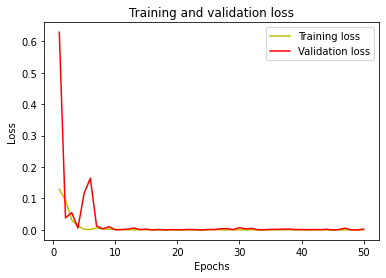

In [33]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

#Prediction

In [35]:
predictions = []

In [36]:
current_batch = train_scaled[-seq_size:]
current_batch = current_batch.reshape(1, seq_size, n_features) #Reshape

In [37]:
future = 7

In [38]:
for i in range(len(test)+future):
  current_pred  = model.predict(current_batch)[0]
  predictions.append(current_pred)
  current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

In [39]:
rescaled_predictions = scaler.inverse_transform(predictions)

In [40]:
rescaled_predictions

array([[18966.0562067 ],
       [19200.65279055],
       [19484.03659773],
       [19805.34019947],
       [20179.79305983],
       [20598.87339306],
       [21089.28494644],
       [21651.26013231],
       [22111.99607325],
       [22632.98706484],
       [23210.56185293],
       [23846.18162251],
       [24538.79191017],
       [25290.71899128],
       [26098.55845547],
       [26960.75443125],
       [27923.01252651],
       [28992.89690208],
       [30184.81712294],
       [31517.16389132],
       [33015.65965796]])

In [41]:
time_series_array = test.index

In [42]:
for k in range(0,future):
  time_series_array = time_series_array.append(time_series_array[-1:] + pd.DateOffset(1))

In [43]:
df_forecast = pd.DataFrame(columns=["actual_confirmed_Death","predicted"], index=time_series_array)

In [46]:
df_forecast.tail(15)

,actual_confirmed_Death,predicted
2021-07-29,19336.0,21089.284946
2021-07-30,19503.0,21651.260132
2021-07-31,19686.0,22111.996073
2021-08-01,20067.0,22632.987065
2021-08-02,20226.0,23210.561853
2021-08-03,20226.0,23846.181623
2021-08-04,20550.0,24538.791910
2021-08-05,20550.0,25290.718991
2021-08-06,NaN,26098.558455
2021-08-07,NaN,26960.754431


In [44]:
df_forecast.loc[:,"predicted"] = rescaled_predictions[:,0]
df_forecast.loc[:,"actual_confirmed_Death"] = test["confirmed"]

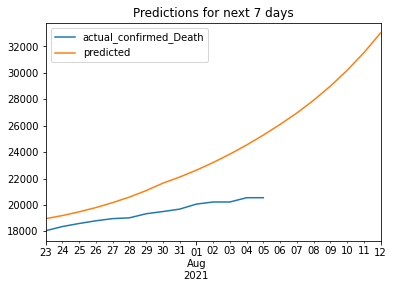

In [45]:
df_forecast.plot(title="Predictions for next 7 days")